In [ ]:
### 主成分分析  PCA，换算成坐标，将其中一个化为0.实现降维

#### 自由度损失。因为你一旦使用了这个均值作为偏差的参考点，等于假定它是“固定”不变的参考线，那样就自动引入了一个约束条件，使得样本偏差之和为 0，进而牺牲了一个自由度。
#### 偏小补偿
#### 无偏估计

#### 特征选择是从已存在的特征中选取携带信息最多的，选完后依然具有解释性。
#### pca 是将原有特征进行线性组合，得到新的特征，且新特征不具有解释性。pca 是无监督学习，特征选择是有监督学习。
#### 线性回归不能使用pca。线性回归是有监督学习，pca 是无监督学习。线性回归是对数据进行建模，pca 是对数据进行降维。


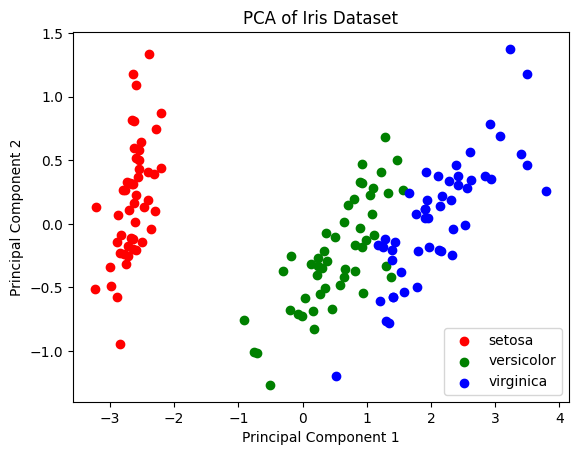

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [15]:
# 特征始终都是2维，特征的维度指有几列
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target 

pca = PCA(n_components=2)  # 降维到2维
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], c="red", label=iris.target_names[0])
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], c="green", label=iris.target_names[1])
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], c="blue", label=iris.target_names[2])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")
plt.legend()
plt.show()
# 方差
pca.explained_variance_

# 解释方差比率，每个主成分解释的方差占总方差的比例，大部分信息几种在第一个特征
pca.explained_variance_ratio_

pca.components_  # 主成分的方向

pca.explained_variance_ratio_.sum()  # 累计解释方差比率

import numpy as np
pca = PCA()
X_pca = pca.fit(X)
np.cumsum(pca.explained_variance_ratio_)  # 累计解释方差比率

In [16]:
pca_mle = PCA(n_components="mle")
X_pca_mle = pca_mle.fit_transform(X)
X_pca_mle.shape

(150, 3)

In [ ]:
# 这段其实没怎么听懂，pca 使用svd 降维的过程。
pca_f = PCA(n_components=0.97.svd_solver="full")  # 保留97%的信息  svd 奇异值分解 更快

X_pca_f = pca_f.fit_transform(X)
X_pca_f.shape  # 97% 的信息保留了多少维度

(150, 2)

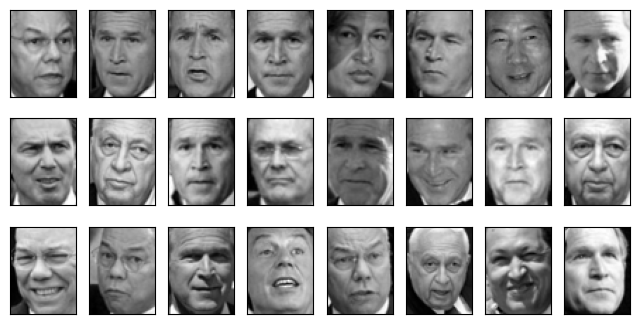

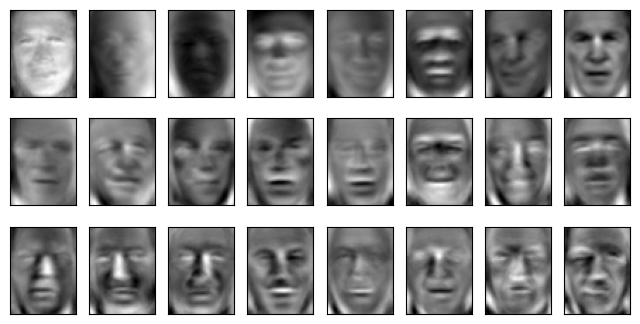

In [29]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
# min_faces_per_person 每个人多少张图
lfw_people = fetch_lfw_people(min_faces_per_person=60)
lfw_people.data.shape
lfw_people.images.shape  # 13,000 张图片，每张图片 62*47=2914 个特征

X = lfw_people.data
y = lfw_people.target
# subplots 子图  4行，5列， subplot_kw={"xticks":[], "yticks":[]} 去掉坐标轴
# fig 画布，axes 子图
fig,axes = plt.subplots(3, 8, figsize=(8, 4), subplot_kw={"xticks":[], "yticks":[]})
# axes[0][0].imshow(lfw_people.images[0])
# [*axes.flat]  # 将axes 转为一维数组

for i, ax in enumerate(axes.flat):
    # https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # cmap="gray" 灰度图
    ax.imshow(lfw_people.images[i], cmap="gray")
    # ax.set_title(lfw_people.target_names[y[i]])
pca = PCA(n_components=150,  random_state=42)  # whiten 白化    
pca.fit(X)  # 训练
V = pca.components_  # 主成分
V.shape
fig,axes = plt.subplots(3, 8, figsize=(8, 4), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    # ax.imshow(V[i].reshape(lfw_people.images.shape[1:]), cmap="gray")
    ax.imshow(V[i].reshape(62, 47), cmap="gray")
    # ax.set_title(lfw_people.target_names[y[i]])
plt.show()


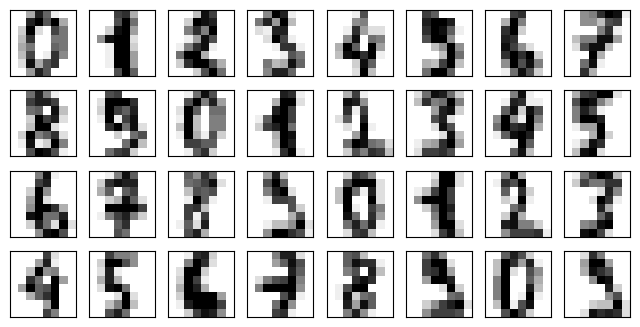

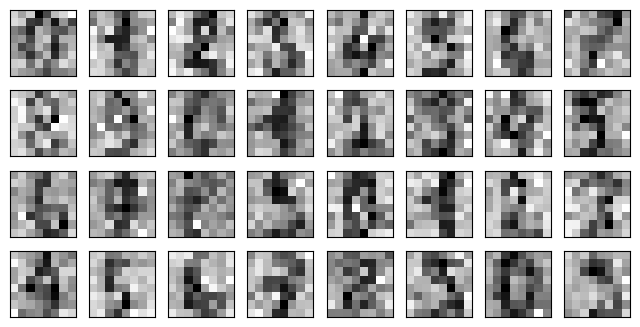

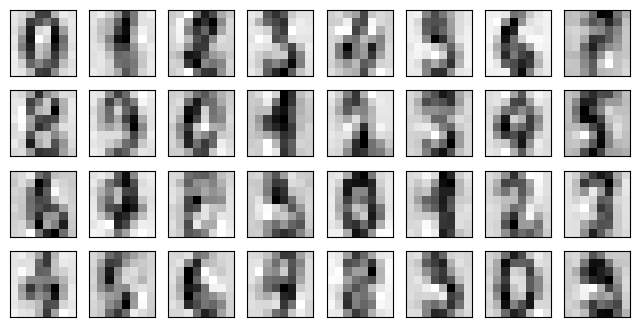

In [ ]:
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
def plot_digits(X,n_row=4, n_col=8):
    fig, axes = plt.subplots(n_row, n_col, figsize=(8, 4), subplot_kw={"xticks":[], "yticks":[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i].reshape(8, 8), cmap="binary")
        # ax.set_title(y[i])
    plt.show()
X.shape  # 1797 张图片，每张图片 8*8=64 个特征
plot_digits(X)  # 原始图片
# 添加部分噪音
# 在指定的数据集中，随机抽取服从正态分布的数据
# np.random.normal(X, 4)  4 是标准差，X 是均值
X_noisy = np.random.normal(X, 4)
plot_digits(X_noisy)  # 添加噪音后的图片

pca = PCA(n_components=0.5,svd_solver="full")  # 降维到2维，白化
X_dr = pca.fit_transform(X_noisy)  # 训练
X_dr.shape  # 降维后的数据
# 去除噪音
without_noise = pca.inverse_transform(X_dr)  # 还原数据
without_noise.shape  # 还原后的数据
plot_digits(without_noise)  # 还原后的图片

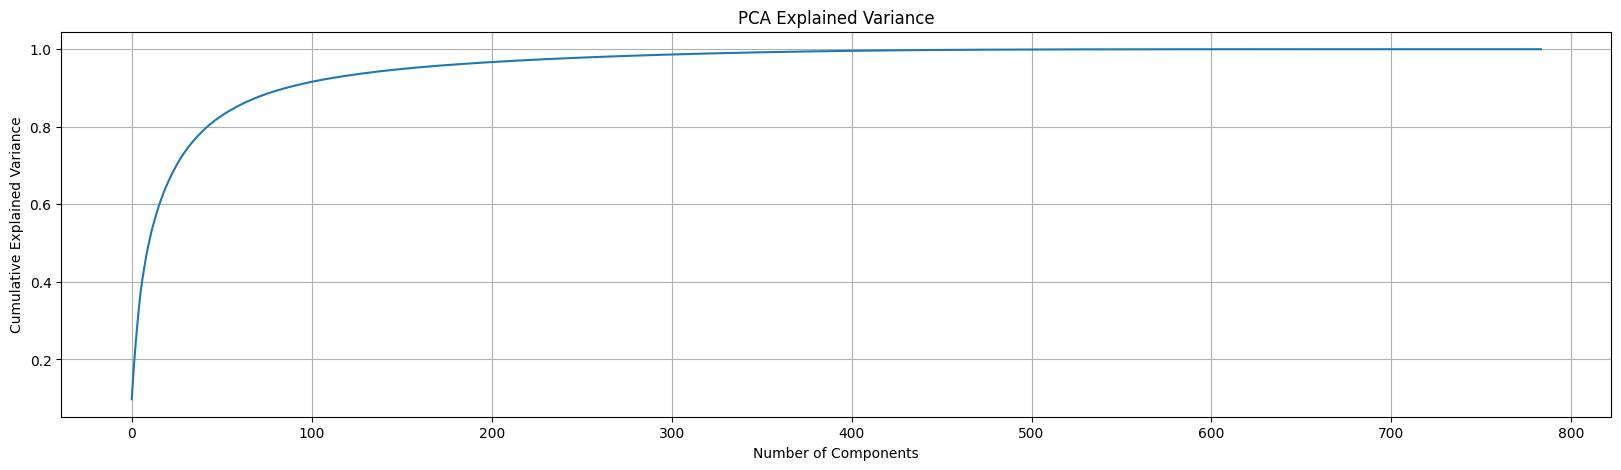

In [42]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")
X = data.drop("label", axis=1).values  # 特征
y = data["label"].values  # 标签

pca_line = PCA().fit(X)
plt.figure(figsize=(20, 5))
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("Number of Components")  # x轴
plt.ylabel("Cumulative Explained Variance")  # y轴
plt.title("PCA Explained Variance")  # 标题
plt.grid()  # 网格
plt.show()  # 显示图形


In [ ]:
# 使用学习曲线可以看到21维是最佳效果
pca = PCA(n_components=21)  # 降维到21维
X_pca = pca.fit_transform(X)  # 训练
# 维度降低，可以使用knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# n_neighbors 可以使用学习曲线来选取最佳值
knn = KNeighborsClassifier(n_neighbors=3)  # k近邻分类器
scores = cross_val_score(knn, X_pca, y, cv=5)  # 交叉验证
scores.mean()  # 平均分数  96.7%

np.float64(0.9681428571428571)